# Description

This Jupyter Notebooks allows to collect your top techniques and NIST security controls based on the top techniques. To determine both, it takes MITRE ATT&CK navigator exports (.json).

## How to use this Jupyter Notebook

1. Make sure to add your MITRE ATT&CK navigator export (.json file) to the 'data' folder in this project
2. Make sure to install all imports. A list of import can be found in the README.md
3. Press the Run and click through every cell


In [7]:
# Imports
import json
import numpy as np
import pandas as pd
import csv

import helper as helper

## Load data

This section load all different relevant data assets. It includes the MITRE ATT&CK navigator .json file.

In [40]:
# Load and prepare MITRE ATT&CK navigator export (adversary.json)
print("Insert the name of the MITRE ATT&CK navigator json file.")
print("It looks for the file within the 'data' folder. Make sure to add the extension (.json).")
print("Press ENTER to continue.")
d = input()
attack_unq = helper.load_prepare_json("./data/" + d)

Insert the name of the MITRE ATT&CK navigator json file.
It looks for the file within the 'data' folder. Make sure to add the extension (.json).
Press ENTER to continue.
top6-scored.json


You have 218 relevant MITRE ATT&CK techniques.

10 techniques with a score of 6:
T1033, T1547.001, T1082, T1071.001, T1016, T1059.001, T1083, T1566.001, T1027, T1105

18 techniques with a score of 5:
T1047, T1135, T1053.005, T1140, T1036.005, T1112, T1059.003, T1059.005, T1070.004, T1049, T1204.002, T1057, T1041, T1566.002, T1553.002, T1588.002, T1518.001, T1124

13 techniques with a score of 4:
T1003, T1543.003, T1005, T1562.001, T1055, T1218.011, T1218.005, T1059, T1204.001, T1078, T1571, T1027.002, T1018

20 techniques with a score of 3:
T1069, T1119, T1106, T1036, T1036.004, T1055.001, T1021.002, T1021.001, T1059.007, T1482, T1568.002, T1497.003, T1102, T1574.002, T1486, T1056.001, T1203, T1012, T1569.002, T1518

54 techniques with a score of 2:
T1003.001, T1133, T1069.002, T1489, T1564.004, T1120, T1071, T1071.004, T1562.004, T1190, T1555.003, T1552.002, T1552.001, T1055.012, T1218.007, T1218.010, T1589.002, T1185, T1021, T1087, T1087.002, T1087.001, T1090, T1090.002, T1059.004, T

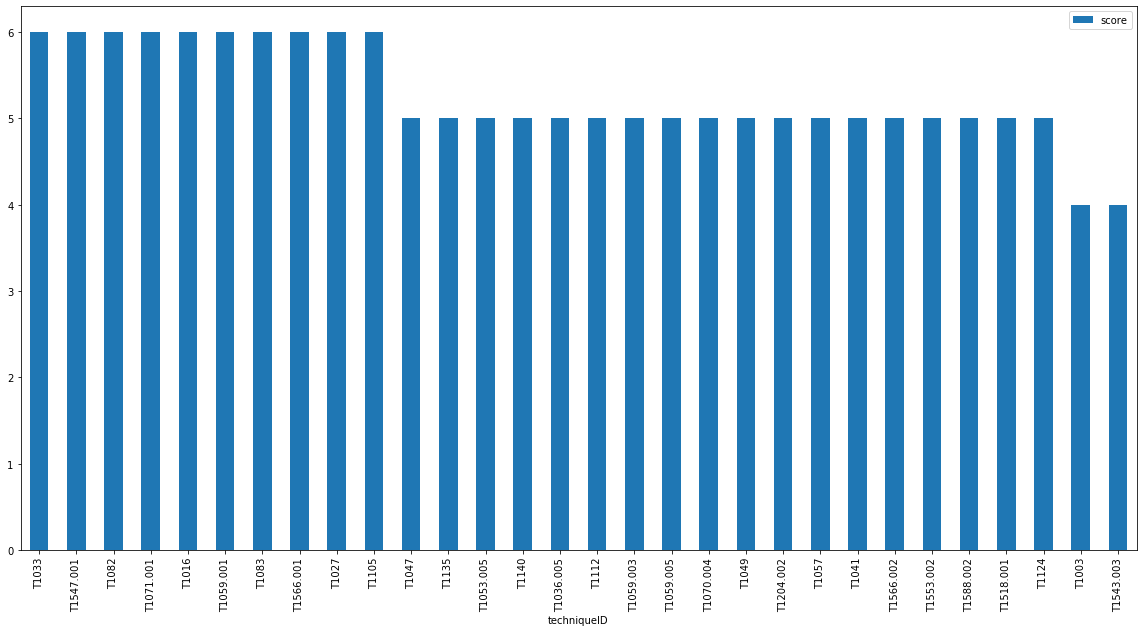

In [41]:
# Visualize top techniques based on their score.
# Convert the numpy array to a list.
attack_sorted_lst = list(attack_unq.tolist())

# Get top 30 techniques for visualization purposes.
df = pd.DataFrame(attack_sorted_lst).head(30)

# Plot top 30 techniques.
df.plot(x='techniqueID', y='score', kind='bar', figsize=(20, 10)) 

print("You have {} relevant MITRE ATT&CK techniques.\n".format(len(attack_sorted_lst)))
helper.print_scores(pd.DataFrame(attack_sorted_lst))

print("Top 30 techniques:\n")

In [42]:
# Load and prepare NIST security controls export (nist.csv)
# Open NIST .csv file and add content to the 'data' variable.
with open('./data/attack-10.1-nist800-53-r5-mappings.csv', 'r') as f:
    data = list(csv.reader(f, delimiter=','))

# Convert all data from the NIST .csv file to a numpy array.
np_nist = np.array(data)

In [43]:
# Correlate MITRE ATT&CK and NIST based on top techniques
shared_techniques = []

# Convert the sorted and unique np.array, containing the ATT&CK techniques, to a list.
# This allow easy iteration. Iterating 0-d np.arrays is a pain...
list_a_unq = list(attack_unq.item())

# Iterate over all elements in the list of ATT&CK techniques.
# Check if the techniqueID is in the NIST np.array.
# If yes, add the techniqueID, score, and tactic to an array (shared_techniques).
# This array contains a sorted list of techniques that are both in our ATT&CK and NIST np.arrays.
for el in list_a_unq:
    if el['techniqueID'] in np_nist:
        d = {
            'techniqueID': el['techniqueID'],
            'score': el['score'],
            'tactic': el['tactic']
        }
        shared_techniques.append(d)
        # shared_techniques is naturally sorted because list_a_unq is already sorted

# Strucutre of the numpy array containing the security controls (np_nist):
# np_nist[0] contains the header --> ['Control ID' 'Control Name' 'Mapping Type' 'Technique ID' 'Technique Name']
# np_nist[idx][0] --> 'Control ID'
# np_nist[idx][1] --> 'Control Name'
# np_nist[idx][2] --> 'Mapping Type'
# np_nist[idx][3] --> 'Technique ID'
# np_nist[idx][4] --> 'Technique Name'

# Variable to hold all top techniques including the corresponding NIST security controls.
top_nist = {}

# Iterate over all techniques shared between NIST and our top ATT&CK techniques.
# For all techniques, iterate over the NIST np.array.
# Check if the techniqueID is in the NIST np.array list.
# If yes, add the corresponding controlID and controlName to a list.
# Finally, the variable top_nist is created.
# top_nist contains all techniqueIDs as keys and the corresponding security controls.
for tech in shared_techniques:
    d = []
    for sec_ctl in np_nist[1:]:
        if tech['techniqueID'] == sec_ctl[3]:   
            dd = {
                'techniqueID': sec_ctl[3],
                'techniqueName': sec_ctl[4],
                'controlID': sec_ctl[0],
                'controlName': sec_ctl[1]
            }
            d.append(dd)
    top_nist[tech['techniqueID']] = d

print("Collected", len(top_nist), "security controls that are relevant for our top techniques.\n")
print("Sorted based on our top techniques and corresponding security controls:\n")

pretty_top_nist = json.dumps(top_nist, indent=4)
print(pretty_top_nist)

Collected 149 security controls that are relevant for our top techniques.

Sorted based on our top techniques and corresponding security controls:

{
    "T1071.001": [
        {
            "techniqueID": "T1071.001",
            "techniqueName": "Web Protocols",
            "controlID": "AC-4",
            "controlName": "Information Flow Enforcement"
        },
        {
            "techniqueID": "T1071.001",
            "techniqueName": "Web Protocols",
            "controlID": "CA-7",
            "controlName": "Continuous Monitoring"
        },
        {
            "techniqueID": "T1071.001",
            "techniqueName": "Web Protocols",
            "controlID": "CM-2",
            "controlName": "Baseline Configuration"
        },
        {
            "techniqueID": "T1071.001",
            "techniqueName": "Web Protocols",
            "controlID": "CM-6",
            "controlName": "Configuration Settings"
        },
        {
            "techniqueID": "T1071.001",
        

In [44]:
# Print based on top security controls
sec_controls = {}

# Look through all techniques and all controls.
# Add the controls to a dictionary and increase its count.
for k, v in top_nist.items():
    # v: All security controls for one top technique.
    for tcn in v:
        # tcn: Each security control for one top technique.
        # Check if the control is already known. 
        # If not, add it. Otherwise add 1 to the score.
        if tcn['controlID'] not in sec_controls:
            sec_controls[tcn['controlID']] = 0
        sec_controls[tcn['controlID']] += 1

# Sort the security controls based on the dictionary's key (occurrences).
sec_controls_sorted = {key: val for key, val in sorted(sec_controls.items(), key = lambda ele: ele[1], reverse=True)}

# Pretty print the the top n security controls found for our top techniques.
top_n = 10
print("Top {} security controls based on the top techniques:\n".format(top_n))
helper.print_n_security_controls(top_n, sec_controls_sorted, np_nist)

Top 10 security controls based on the top techniques:

[
    {
        "controlName": "System Monitoring",
        "controlID": "SI-4",
        "score": 133
    },
    {
        "controlName": "Configuration Settings",
        "controlID": "CM-6",
        "score": 119
    },
    {
        "controlName": "Baseline Configuration",
        "controlID": "CM-2",
        "score": 99
    },
    {
        "controlName": "Malicious Code Protection",
        "controlID": "SI-3",
        "score": 91
    },
    {
        "controlName": "Continuous Monitoring",
        "controlID": "CA-7",
        "score": 87
    },
    {
        "controlName": "Least Privilege",
        "controlID": "AC-6",
        "score": 84
    },
    {
        "controlName": "Access Enforcement",
        "controlID": "AC-3",
        "score": 82
    },
    {
        "controlName": "Least Functionality",
        "controlID": "CM-7",
        "score": 79
    },
    {
        "controlName": "Account Management",
        "controlID"

## Ideas / Features

- Hide code
- Run a at once
- Compare multiple .json files
- Add controlers to change bar-char numbers
- Add export capabilities